## Homework 2: Wine Quality Prediction Using SGD
### Editor: Seth Cram
### Course: CS 474/574: Deep Learning/2022 Fall
### Due: 09/25/2022


Add your code to the following sections:

    ## add your code here
    #-----------------------

    #---------------------------------
    
Description: In this homework, you are going to practice cross-validation and implement the stochastic gradient optimization (mini-batch) to solve the wine quality prediction problem. Using the following code as your template. Specific requirements:

1. Use all function definitions given in the code (e.g., def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):); and do not change the function names and input arguments. (deduct 5 points for doing this)

2. Evaluate (Cross-validation) the model trained using GD (20 points)

3. SGD implementation. 40 pts
   
4. Calculate and print out the MSE and MAE values of SGD for the training and test sets (15 points)
5. Plot the loss curve of the SGD. (5 points)
6. Plot the mse curves on the training and test sets using different models (w_hist). (20 points)

### Common mistakes
    
1. Call GD and SGD using the whole dataset

    -- GD and SGD are used to optimize the model (learn w); and we should call them using the training sets
   
2. Calculate gradient using the whole training set for SGD
    
    -- In SGD, update gradient only using mini-batches
  
3. Calculate the loss of each epoch using the average of all minibatches
    
    -- should use the w of the last mini-batch and the whole training set to calculate the loss  
   
4. Mix concepts of loss function and evaulation metrics
    -- loss function: for optimization purpose (gradient). We use the sum of square errors in this homework. L = 1/2 * sum(y_hat_i - y_i)^2
    
    -- evaluation metrics: mse and mae: mse = 1/m * sum(y_hat_i - y_i)^2, mae = 1/m * sum(abs(y_hat_i - y_i))

### 1. Load data, implement the model, loss function and GD 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## (1) Data preparation
df=pd.read_csv('winequality-white.csv', sep = ';')
df
X = df.values[:, :11]
Y = df.values[:, 11]
print('Data shape:', 'X:', X.shape, 'Y:', Y.shape)

# data normalization
min_vals = np.min(X, axis = 0)
max_vals = np.max(X, axis = 0)
X1 = (X-min_vals)/(max_vals-min_vals)

##(2) Assume a linear mode that y = w0*1 + w_1*x_1 +w_2*x_2+...+ w_11*x_11
def predict(X, w):
    '''
    X: input feature vectors:m*n
    w: weights
    
    return Y_hat
    '''
    # Prediction
    Y_hat = np.zeros((X.shape[0]))
    for idx, x in enumerate(X):          
        y_hat = w[0] + np.dot(w[1:].T, np.c_[x]) # linear model
        Y_hat[idx] = y_hat    
    return Y_hat

## (3) Loss function: L = 1/2 * sum(y_hat_i - y_i)^2
def loss(w, X, Y):
    '''
    w: weights
    X: input feature vectors
    Y: targets
    '''
    Y_hat = predict(X, w)
    loss = 1/2* np.sum(np.square(Y - Y_hat))
    
    return loss

# Optimization 1: Gradient Descent
def GD(X, Y, lr = 0.001, delta = 0.01, max_iter = 100):
    '''
    X: training data
    Y: training target
    lr: learning rate
    max_iter: the max iterations
    '''
    
    m = len(Y)
    b = np.reshape(Y, [Y.shape[0],1])
    w = np.random.rand(X.shape[1] + 1, 1)
    A = np.c_[np.ones((m, 1)), X]
    gradient = A.T.dot(np.dot(A, w)-b)
    
    loss_hist = np.zeros(max_iter) # history of loss
    w_hist = np.zeros((max_iter, w.shape[0])) # history of weight
    loss_w = 0
    i = 0                  
    while(np.linalg.norm(gradient) > delta) and (i < max_iter):
        w_hist[i,:] = w.T
        loss_w = loss(w, X, Y)
        print(i, 'loss:', loss_w)
        loss_hist[i] = loss_w
        
        w = w - lr*gradient        
        gradient = A.T.dot(np.dot(A, w)-b) # update the gradient using new w
        i = i + 1
        
    w_star = w  
    return w_star, loss_hist, w_hist

Data shape: X: (4898, 11) Y: (4898,)


### 2. Model evaluation using cross-validation (20 points)

In [2]:
## 2.1 Split the dataset into training (70%) and test (30%) sets. (5 points)
from sklearn.model_selection import train_test_split

## add your code here
#-----------------------

# data split of 70 training and 30 test
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.3)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
#---------------------------------

(3428, 11) (1470, 11)
(3428,) (1470,)


In [3]:
## 2.2 Model training using the training set and the GD function (5 points )
## add your code here
#-----------------------

w_star, loss_hist, w_hist = GD(X_train, y_train, lr=0.00001) #lower lr bc overshooting before

print(w_star.shape, loss_hist.shape, w_hist.shape)

#---------------------------------

0 loss: 30837.566532100358
1 loss: 27395.69960325747
2 loss: 24355.277580691014
3 loss: 21669.47320208721
4 loss: 19296.92146382263
5 loss: 17201.08246496524
6 loss: 15349.67857360078
7 loss: 13714.197246009413
8 loss: 12269.451840485666
9 loss: 10993.193660901525
10 loss: 9865.769254217605
11 loss: 8869.817683205923
12 loss: 7990.003111396373
13 loss: 7212.778581182552
14 loss: 6526.177346499
15 loss: 5919.628545912188
16 loss: 5383.794376889427
17 loss: 4910.426263198161
18 loss: 4492.237799944257
19 loss: 4122.792519188317
20 loss: 3796.404747364318
21 loss: 3508.0520273812735
22 loss: 3253.2977564225866
23 loss: 3028.222847812734
24 loss: 2829.365364321067
25 loss: 2653.66719305862
26 loss: 2498.426940587362
27 loss: 2361.2583226728557
28 loss: 2240.053407746758
29 loss: 2132.9501479085275
30 loss: 2038.3036973378687
31 loss: 1954.661076327814
32 loss: 1880.7387906819408
33 loss: 1815.4030617413864
34 loss: 1757.6523625195728
35 loss: 1706.601990944134
36 loss: 1661.4704425836408
3

In [4]:
## 2.3. calculating mse&mae values on the training set and test set, respectively. (10 points)

#training error
## add your code here
#-----------------------

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

"""
def MSE(Y, Y_hat):
    Y_length = len(Y)
    Y_hat_length = len(Y_hat)
    
    #ensure same num of ellys for both target and prediction vals
    assert Y_length == Y_hat_length, "{} target values but only {} prediction values".format(Y_length, Y_hat_length)
    
    mse = 
    
    return mse
"""

y_train_prediction = predict(X_train, w_star)

#w_star = last elly of every w_hist
# the resultant prediction from that GD run

#mse_train = mean_squared_error(y_true=y_train, y_pred=w_star )
mse_train = mean_squared_error(y_true=y_train, y_pred=y_train_prediction )
mae_train = mean_absolute_error(y_true=y_train, y_pred=y_train_prediction )

print('training mse: {} and training mae:{}'.format(mse_train, mae_train))
#---------------------------------


## test error
## add your code here
#-----------------------

y_test_prediction = predict(X_test, w_star)

mse_test = mean_squared_error(y_true=y_test, y_pred=y_test_prediction )
mae_test = mean_absolute_error(y_true=y_test, y_pred=y_test_prediction )

print('test mse: {} and test mae:{}'.format(mse_test, mae_test))
#---------------------------------

training mse: 0.7603841594876564 and training mae:0.677183871442379
test mse: 0.7011992289949088 and test mae:0.658390442183726


### 3. SGD implementation (40 points)
Use the SGD function definition given in the code (def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):); and do not change it.

In [5]:
from sklearn.utils import shuffle

def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100): 
    '''Implement the minibatch Gradient Desent approach
    
        X: training data
        Y: training target
        lr: learning rate
        batch_size: batch size
        epoch: number of max epoches
        
        return: w_star, w_hist, loss_hist
    '''
    m = len(Y)
    np.random.seed(9)
    w = np.random.rand(X.shape[1]+1, 1)    #(12,1) values in [0, 1)
    w_hist = np.zeros((epoch, w.shape[0])) # (epoch,12) 
    loss_hist = np.zeros(epoch)            # (epoch,)
   
    
    ## add your code here
    #-----------------------
    for i in range(epoch):
        #(1) Shuffle data (X and Y) at the beginning of each epoch. (5 points)
        
        #perform a permutation w/ repitition 
        Xshuffled = shuffle(X)
        Yshuffled = shuffle(Y)
        
        #could also use np.random.permutation instead to shuffle inplace (X, Y would change)
        
        #(2) go through all minibatches and update w. (30 points)
        for b in range(int(m/batch_size)): 
            # prepare the b mininath X_batch and Y_batch. 10 points
            
            #excludes data that didn't fit in a batch on the end of X and Y
            
            batchPrevCutoffIndex = batch_size * b
            batchCurrCutoffIndex = batch_size * (b+1)
            
            #print("Batch number is {} and the highest batch number is {}.".format(b, int(m/batch_size)-1))
            
            #separate shuffled data into batches at the cutoff points within the data
            X_batch = Xshuffled[batchPrevCutoffIndex:batchCurrCutoffIndex]
            Y_batch = Yshuffled[batchPrevCutoffIndex:batchCurrCutoffIndex]
            
            #prepare A_batch and b_batch. 10 points

            A_batch = np.c_[np.ones((batch_size, 1)), X_batch]
            b_batch = np.reshape(Y_batch, [Y_batch.shape[0],1])
            
            #gradient calcualation and w update. 10 points
            gradient = A_batch.T.dot(np.dot(A_batch, w)-b_batch) # update the gradient using new w and only batches
            w = w - lr*gradient        
            
            #print(i, b, X_batch.shape, A_batch.shape)

            
            
        ## (3) Save the loss and current weight for each epoch. 5 points
        w_hist[i,:] = w.T
        #use the w of the last mini-batch and whole training set to calc loss
        loss_w = loss(w, X, Y)
        #print(i, 'loss:', loss_w)
        loss_hist[i] = loss_w
        
        #print(i, loss_hist[i])
        
        ##(4) Decay learning rate at the end of each epoch. 
        lr = lr * 0.9
    #---------------------------------
    
    w_star = w
    return w_star, w_hist, loss_hist  

### 4. Calculate and print out the MSE and MAE values of SGD for the training and test sets (15 points)

In [6]:
batch_size = 32
n_epochs = 50

#train model using SGD
w_star_SGD, w_hist_SGD, loss_hist_SGD = SGD(X_train, y_train, lr = 0.0001, batch_size = batch_size, epoch = n_epochs)

## add your code here
#-----------------------
#(1) print out the predicted wine quality values and the true quality 
# values of the first 10 data samples in the test dataset.  5 points

y_test_prediction = predict(X_test, w_star)

print("First 10 predicted wine values: {}".format(y_test_prediction[0:10]))
print("First 10 true wine values: {}".format(y_test[0:10]))

#(2) mse and mae of the training set. 5 points

y_train_prediction = predict(X_train, w_star)

mse_train = mean_squared_error(y_true=y_train, y_pred=y_train_prediction )
mae_train = mean_absolute_error(y_true=y_train, y_pred=y_train_prediction )

print('training mse: {} and training mae: {}'.format(mse_train, mae_train))

#(3)mse and mae of the test set. 5 points

mse_test = mean_squared_error(y_true=y_test, y_pred=y_test_prediction )
mae_test = mean_absolute_error(y_true=y_test, y_pred=y_test_prediction )

print('test mse: {} and test mae: {}'.format(mse_test, mae_test))

#---------------------------------

First 10 predicted wine values: [6.07593401 5.46027957 6.03303806 6.12201225 4.94142222 5.30186933
 5.84780472 5.57110456 5.84986397 5.62310181]
First 10 true wine values: [7. 5. 6. 6. 5. 7. 6. 6. 6. 5.]
training mse: 0.7603841594876564 and training mae: 0.677183871442379
test mse: 0.7011992289949088 and test mae: 0.658390442183726


### 5. Plot the loss curve of the SGD. (5 points)

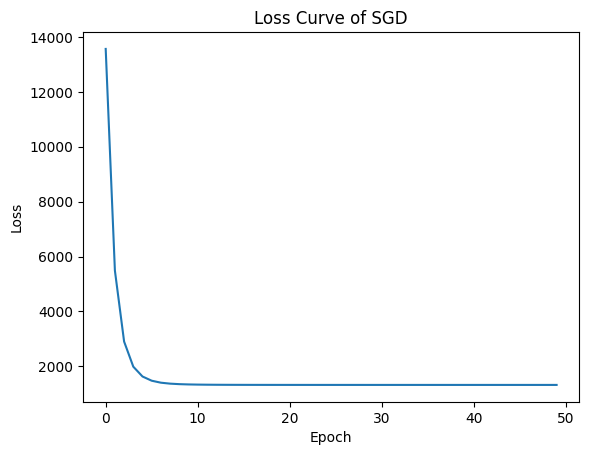

In [7]:
## add your code here
#-----------------------

t = np.arange(0, len(loss_hist_SGD))

#plt.hist(loss_hist_SGD)
plt.plot(t, loss_hist_SGD)
plt.title("Loss Curve of SGD")
#plt.xlabel('Loss')
#plt.ylabel('Occurences of loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#---------------------------------

### 6. Plot the mse curves on the training and test sets using different models (w_hist). (20 points)

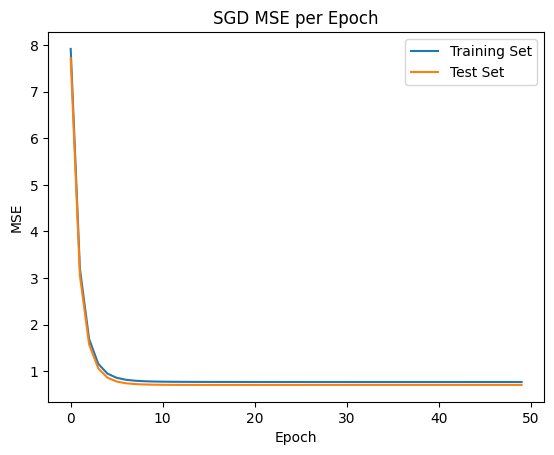

In [9]:
mse_SGD_train=np.zeros(n_epochs)
mse_SGD_test=np.zeros(n_epochs)

## add your code here
#-----------------------

w_hist_SGD_len = len(w_hist_SGD)

for i in range(w_hist_SGD_len):
    y_train_SGD_prediction = predict(X_train, w_hist_SGD[i])
    mse_SGD_train[i] = mean_squared_error(y_true=y_train, y_pred=y_train_SGD_prediction )

    y_test_SGD_prediction = predict(X_test, w_hist_SGD[i])
    mse_SGD_test[i] = mean_squared_error(y_true=y_test, y_pred=y_test_SGD_prediction )

t = np.arange(0,w_hist_SGD_len)

plt.plot(t, mse_SGD_train, label="Training Set")
plt.plot(t, mse_SGD_test, label="Test Set")
plt.legend()
plt.title("SGD MSE per Epoch")
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

#---------------------------------